[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11746377876144653890
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7018292839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15299223194232390493
physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5"
]
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 30s 754us/sample - loss: 4.6274 - accuracy: 0.0099 - val_loss: 4.6113 - val_accuracy: 0.0091
Epoch 2/5
40000/40000 [==============================] - 32s 797us/sample - loss: 4.6104 - accuracy: 0.0098 - val_loss: 4.6130 - val_accuracy: 0.0077
Epoch 3/5
40000/40000 [==============================] - 28s 699us/sample - loss: 4.6100 - accuracy: 0.0097 - val_loss: 4.6117 - val_accuracy: 0.0084
Epoch 4/5
40000/40000 [==============================] - 25s 628us/sample - loss: 4.6104 - accuracy: 0.0091 - val_loss: 4.6110 - 

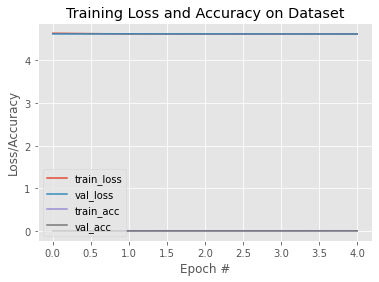

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend as K
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#with tf.device('/gpu:0'): 
#    sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))

NUM_EPOCHS =10
INIT_LR = 1e-3
BATCH_SIZE = 50

cifar100_mnist = tf.keras.datasets.cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

droprate = 0.5
verbosity = 1
num_classes =100
input_shape = (32,32,3)

if K.image_data_format() == "channels_first":
    train_images_cnn = train_images.reshape((train_images.shape[0], 3, 32, 32))
    test_images_cnn = test_images.reshape((test_images.shape[0], 3, 32, 32))
else:
    train_images_cnn = train_images.reshape((train_images.shape[0], 32, 32, 3))
    test_images_cnn = test_images.reshape((test_images.shape[0], 32, 32, 3))

img_input = tf.keras.Input(shape=(input_shape))

conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu')(img_input)
#batch1 = tf.keras.layers.BatchNormalization()(conv1)
pooling1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
#dropout1 = tf.keras.layers.Dropout(droprate)(pooling1)

conv2 = tf.keras.layers.Conv2D(64, 3, activation='relu')(pooling1)
#batch2 = tf.keras.layers.BatchNormalization()(conv2)
pooling2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
#dropout2 = tf.keras.layers.Dropout(droprate)(pooling2)

conv3 = tf.keras.layers.Conv2D(64, 3, activation='relu')(pooling1)
#batch2 = tf.keras.layers.BatchNormalization()(conv2)
pooling3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
#dropout2 = tf.keras.layers.Dropout(droprate)(pooling2)

flatten1 = tf.keras.layers.Flatten() (pooling3)

fc1 = tf.keras.layers.Dense(1000, activation='relu')(flatten1)
fc2 = tf.keras.layers.Dense(500, activation='relu')(fc1)
#batch3 = tf.keras.layers.BatchNormalization()(fc1)
#dropout3 = tf.keras.layers.Dropout(droprate)(batch3)
classification_utput = tf.keras.layers.Dense(num_classes, activation='softmax')(fc2)


model = tf.keras.models.Model(inputs=img_input, outputs=classification_utput)

opt = tf.optimizers.Adam(learning_rate=INIT_LR)
model.compile(optimizer= opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 
H = model.fit(train_images_cnn, train_labels,batch_size=BATCH_SIZE,
              epochs=NUM_EPOCHS,verbose=verbosity,validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images_cnn, test_labels)

print('Test accuracy:', test_acc)
predictions = model.predict(test_images_cnn)

predictions[0]

N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss") # no validation data for this example
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc") # no validation data for this example
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
